## Face Recognition

In [1]:
# import modules
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from mtcnn import MTCNN
from keras_facenet import FaceNet
import pickle

#### Test Image

In [42]:
# melihat gambar
path_bayu = "../database/Bagus Purboyo/4.jpg"
path_falisa = "../database/Falisa Alfiani Heriansyah/11.jpg"
def read_image(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

img_bayu = read_image(path_bayu)
img_falisa = read_image(path_falisa)

#### Detect Face

1/1 [==============================] - 0s 59ms/step


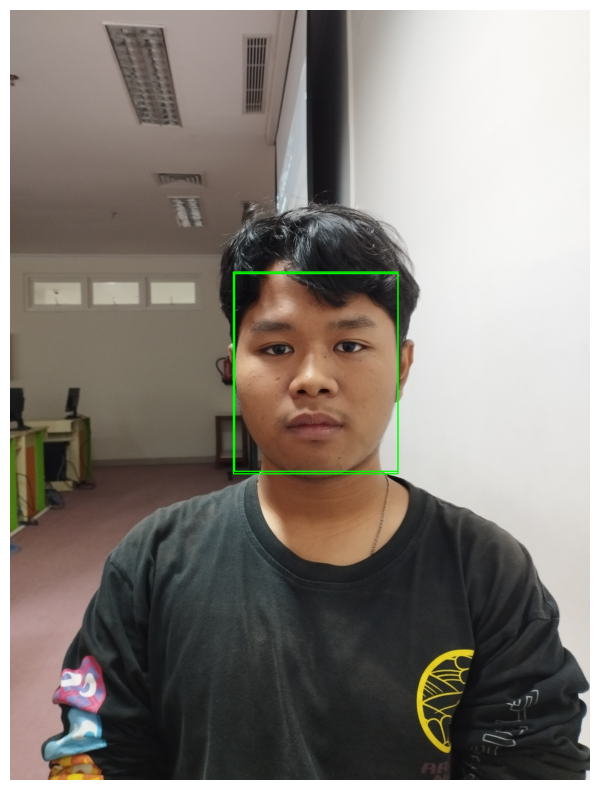

In [44]:
# Mendeteksi muka
detector = MTCNN()
result_bayu = detector.detect_faces(img_bayu)
result_falisa = detector.detect_faces(img_falisa)

# bounding box
x, y, w, h = result_bayu[0]['box']

# draw bounding box on image
img = cv.rectangle(img_bayu, (x, y), (x+w, y+h), (0, 255, 0), 5)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)

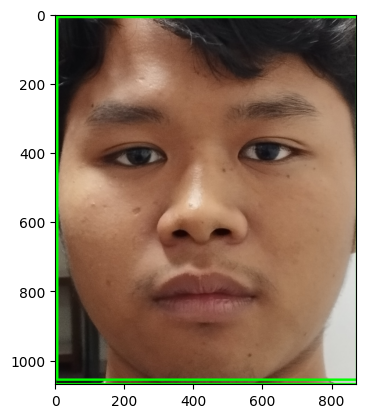

In [45]:
# get image in bounding box
face_bayu = img[y:y+h, x:x+w]

plt.imshow(face_bayu)

In [46]:
face_bayu.shape

(1069, 871, 3)

In [50]:
# Dapatkan ukuran gambar
h_bagus, w_bagus, c_ = face_bayu.shape
h_falisa, w_falisa, c_ = face_falisa.shape

# Tampilkan ukuran gambar
print(f"Ukuran Gambar Wajah Bagus adalah Height: {h_bagus} x Width: {w_bagus}")
print(f"Ukuran Gambar Wajah Falisa adalah Height: {h_falisa} x Width: {w_falisa}")
print(f"")

Ukuran Gambar Wajah Bagus adalah Height: 1069 x Width: 871
Ukuran Gambar Wajah Falisa adalah Height: 855 x Width: 690



In [52]:
my_face = img[y:y+h, x:x+w] 

# resize image cause facenet uisng 160x160 image
face_falisa = cv.resize(face_falisa, (160, 160))
face_bayu = cv.resize(face_bayu, (160, 160))
# plt.imshow(face_falisa)

h_bagus, w_bagus, c_ = face_bayu.shape
h_falisa, w_falisa, c_ = face_falisa.shape

# Tampilkan ukuran gambar
print(f"Ukuran Gambar Wajah Bagus adalah Height: {h_bagus} x Width: {w_bagus}")
print(f"Ukuran Gambar Wajah Falisa adalah Height: {h_falisa} x Width: {w_falisa}")

Ukuran Gambar Wajah Bagus adalah Height: 160 x Width: 160
Ukuran Gambar Wajah Falisa adalah Height: 160 x Width: 160



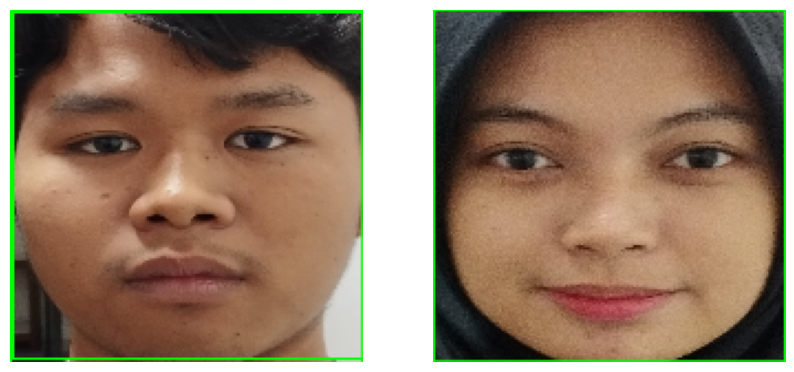

In [54]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(face_bayu)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(face_falisa)
plt.axis('off')
plt.show()

### Preprocessing Images

In [58]:
# extract face
def extract_face(detector, filename, target_size=(160, 160)):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x, y, w, h = detector.detect_faces(img)[0]['box']
    x, y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, target_size)
    return face_arr

# load faces
def load_faces(directory, detector):
    faces = []
    for im_name in os.listdir(directory):
        try:
            path = os.path.join(directory, im_name)
            single_face = extract_face(detector, path)
            faces.append(single_face)
        except Exception as e:
            pass
    return faces

# load classes
def load_classes(directory, detector):
    X = []
    Y = []
    for sub_dir in os.listdir(directory):
        path = os.path.join(directory, sub_dir)
        faces = load_faces(path, detector)
        labels = [sub_dir for _ in range(len(faces))]
        print(f"Loaded successfully: {len(labels)}")
        X.extend(faces)
        Y.extend(labels)
    return np.asarray(X), np.asarray(Y)

# plot image
def plot_images(images, labels):
    plt.figure(figsize=(18, 16))
    for num, image in enumerate(images):
        ncols = 3
        nrows = len(labels) // ncols + 1
        plt.subplot(nrows, ncols, num + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [59]:
path = "../database/"
x_feature, y_labels  = load_classes(path, detector)

1/1 [==============================] - 0s 175ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 67ms/step
Loaded successfully: 12
1/1 [==============================] - 0s 55ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 64ms/step
Loaded successfully: 13
1/1 [==============================] - 0s 41ms/step
Loaded successfully: 10
1/1 [==============================] - 2s 2s/step
Loaded successfully: 12
1/1 [==============================] - 0s 127ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 190ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 38ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 52ms/step
Loaded successfully: 13
1/1 [==============================] - 0s 55ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 44ms/step
Loaded successfully: 12
1/1 [==============================] - 0s 75ms/step
Loaded successfully: 9
1/1 [=========

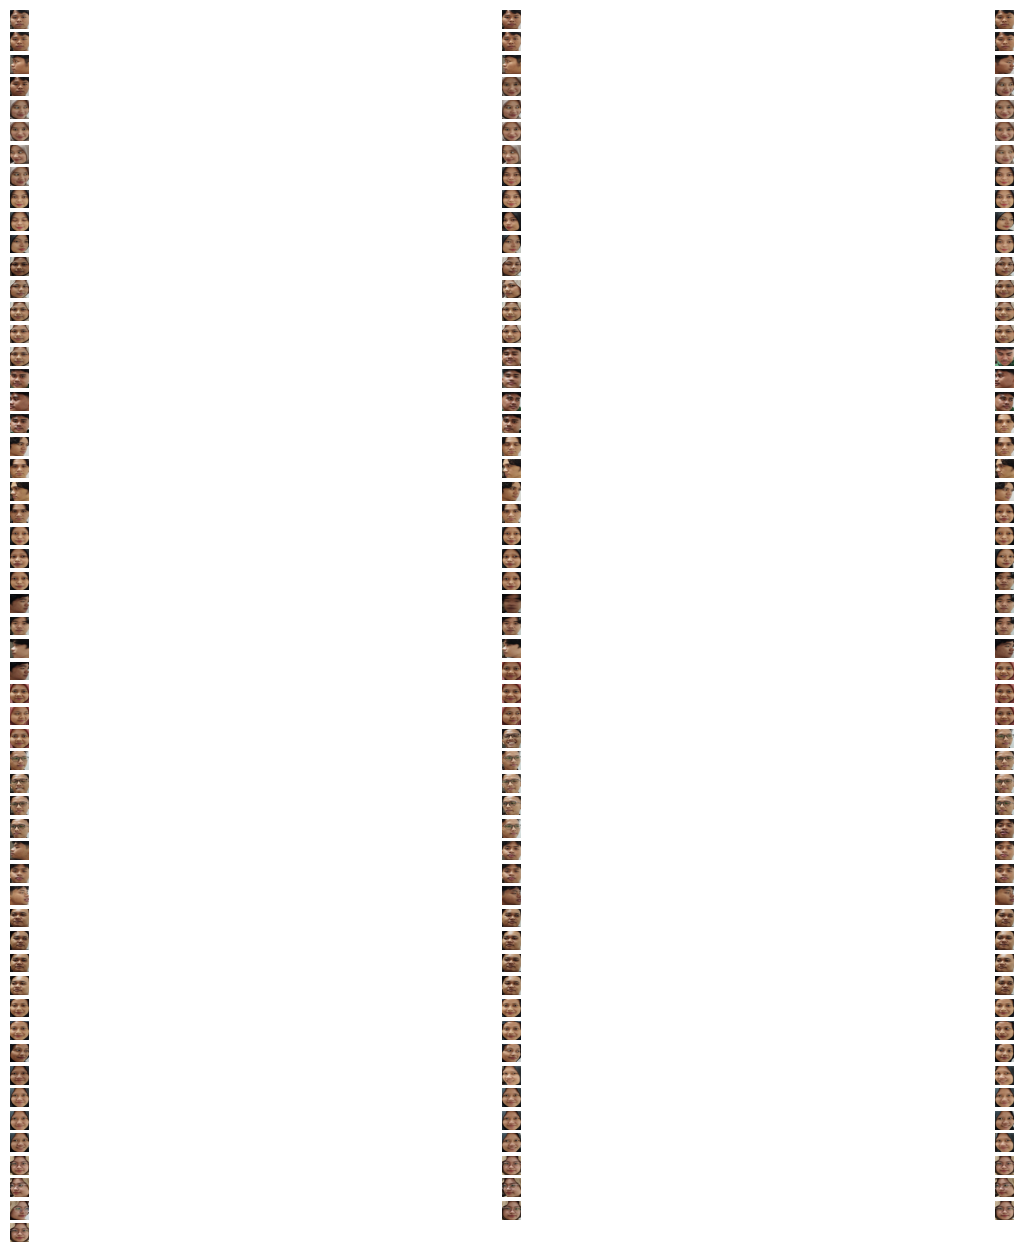

In [60]:
# plot the images
plot_images(x_feature, y_labels)

In [61]:
# inisiasi objek

embedder = FaceNet()
def get_embeddings(img):
    img = np.expand_dims(img, axis=0)
    embedding = embedder.embeddings(img)
    embedding = embedding[0]
    return embedding

embeddings = np.asarray([get_embeddings(face) for face in x_feature])

1/1 [==============================] - 0s 121ms/step


In [62]:
# save embeddings
np.savez_compressed("../packages/embeddings.npz", embeddings=embeddings, labels=y_labels)

### Modelling

In [7]:
# load model
embeddings = np.load("../packages/embeddings.npz")

In [8]:
X = embeddings['embeddings']
y = embeddings['labels']

In [9]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [160]:
# mengubah label menjadi numerik
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

## Skema 1

In [161]:
# melatih model SVM
model = SVC(kernel='linear', probability=True)
model.fit(X, y_encoded)

SVC(kernel='linear', probability=True)

In [165]:
# from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# import seaborn as sns



In [164]:
# cm = confusion_matrix(y_test, yhat)

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [166]:
# detect face
path = "../testing/testing01.jpg"
img = cv.imread(path)
test_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
x, y, w, h = detector.detect_faces(test_img)[0]['box']


NameError: name 'detector' is not defined

In [ ]:
# get embedding
test_img = test_img[y:y+h, x:x+w]
test_img = cv.resize(test_img, (160, 160))
test_embedding = get_embeddings(test_img)

1/1 [==============================] - 1s 796ms/step


In [ ]:
yhat = model.predict_proba([test_embedding])

In [ ]:
yhat

array([5], dtype=int64)

In [ ]:
# yhat = np.argmax(yhat)
yhat = encoder.inverse_transform([yhat])
yhat[0]

c:\Users\Aditya\miniconda3\envs\skripsi\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'Heri Arista'

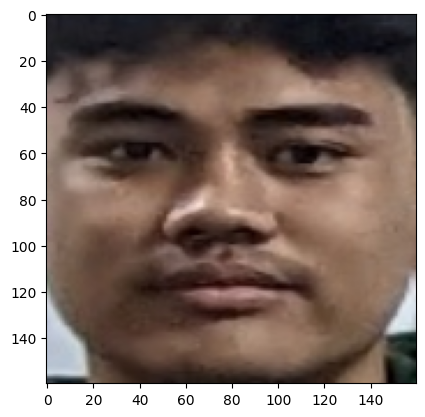

In [ ]:
plt.imshow(test_img)

### Save the Model

In [167]:
with open("../packages/model.pkl", "wb") as f:
    pickle.dump(model, f)

In [168]:
with open("../packages/encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)